# Άσκηση 1, Ανίχνευση ακμών:
Θεωρήστε  τις  εικόνες  αποχρώσεων  του  γκρι  (grayscale image) `leaf.jpg`, `X-ray.jpeg` και `parking-lot.jpg`. 
 
**Ζητούμενα:** 

Α. Σχεδιάστε, περιγράψτε και εφαρμόστε 3 διαφορετικές μεθόδους για την ανίχνευση των κύριων ακμών κάθε εικόνας (δηλαδή να δοθεί έμφαση στην ανίχνευση των ορίων και των περιγραμμάτων των εικονιζόμενων αντικειμένων). 

Β. Για κάθε εικόνα, τυπώστε την αρχική εκδοχή της και τις 3 βέλτιστες δυαδικές μάσκες ανίχνευσης ακμών κάθε μεθόδου. Σχολιάστε τα αποτελέσματα. 

Για όλες τις περιπτώσεις ανίχνευσης ακμών, τυπώστε μόνο τη (βέλτιστη) δυαδική μάσκα που προκύπτει από κάθε μέθοδο και εξηγήστε λεπτομερώς τη διαδικασία σχεδίασης (π.χ. επιλογή μεθόδου, καθορισμός παραμέτρων, κτλ.).

In [51]:
%pip install matplotlib numpy scikit-image scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


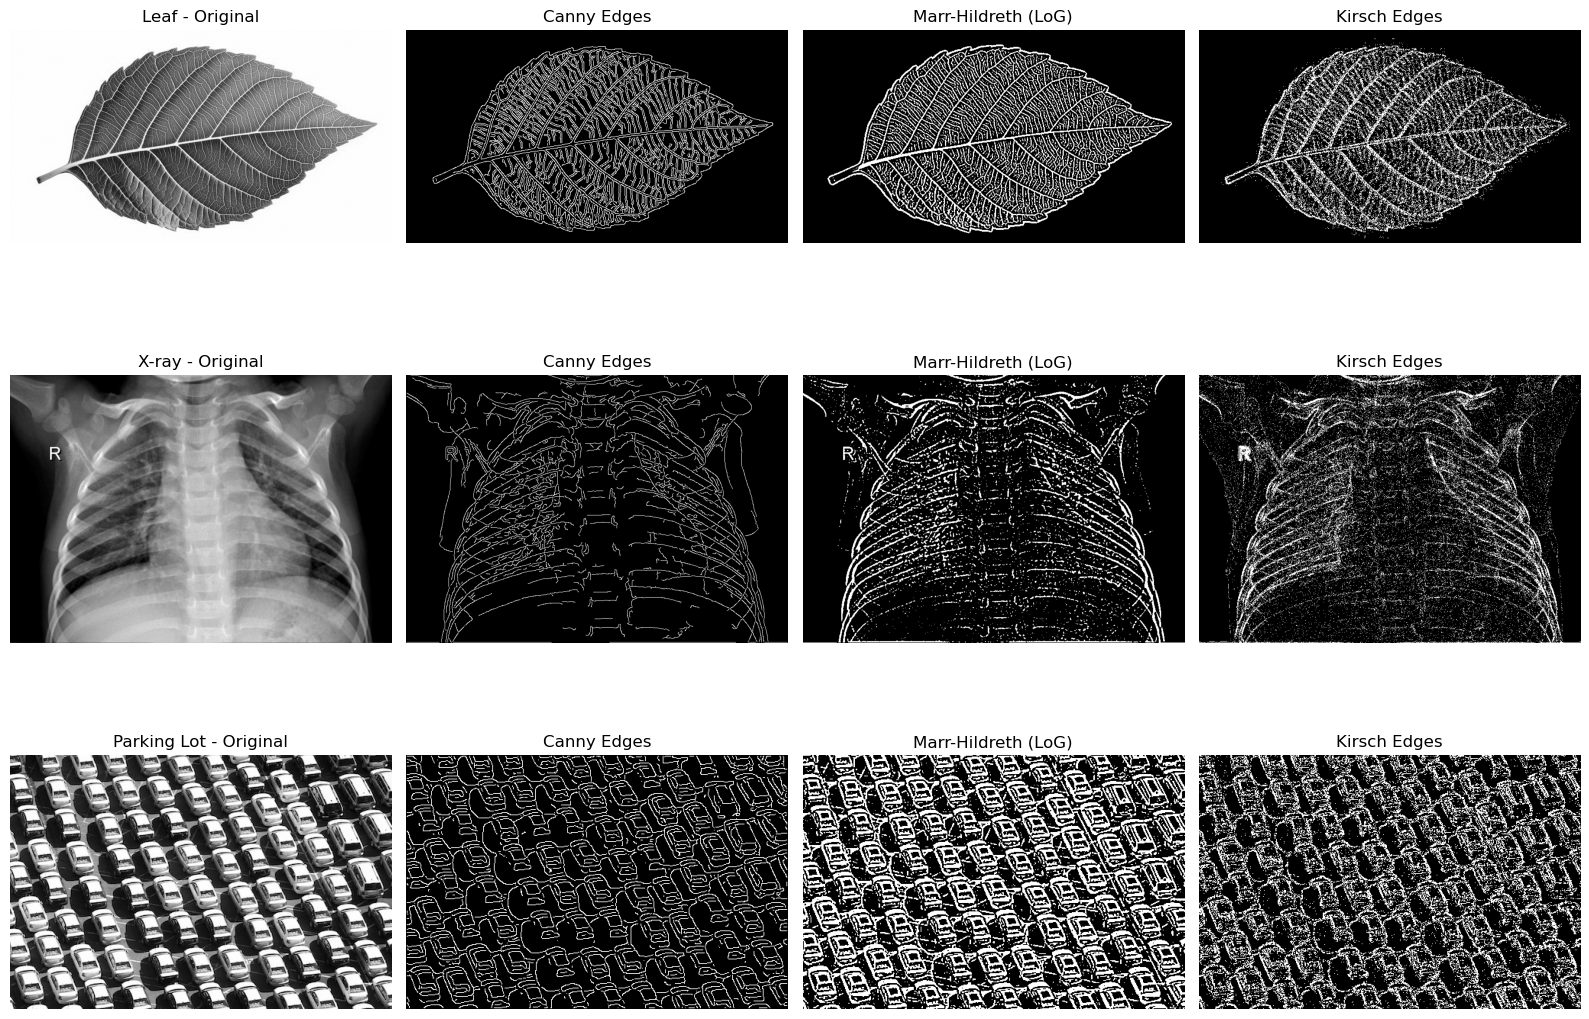

In [52]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci

# Φόρτωση εικόνων
image_leaf = ski.io.imread("https://github.com/KaratziasK/Digital-Image-Processing/blob/main/project-2/instructions/images-project-2/leaf.jpg?raw=true")
image_x_ray = ski.io.imread("https://github.com/KaratziasK/Digital-Image-Processing/blob/main/project-2/instructions/images-project-2/X-ray.jpeg?raw=true")
image_parking_lot = ski.io.imread("https://github.com/KaratziasK/Digital-Image-Processing/blob/main/project-2/instructions/images-project-2/parking-lot.jpg?raw=true")

# Λίστα εικόνων και τίτλων
images = [image_leaf, image_x_ray, image_parking_lot]
titles = ['Leaf', 'X-ray', 'Parking Lot']

# Kirsch masks
A = 15
kirsch_masks = [
    np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]) / A,
    np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]) / A,
    np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]) / A,
    np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]]) / A,
    np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]) / A,
    np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]) / A,
    np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]) / A,
    np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]) / A,
]

canny_edges = []
log_edges = []
kirsch_edges = []

# Canny
image_leaf_canny = ski.feature.canny(image_leaf, sigma=1.1)
image_x_ray_canny = ski.feature.canny(image_x_ray, sigma=1)
image_parking_lot_canny = ski.feature.canny(image_parking_lot, sigma=1.8)

canny_edges.append(image_leaf_canny)
canny_edges.append(image_x_ray_canny)
canny_edges.append(image_parking_lot_canny)

# LoG
image_leaf_gauss = ski.filters.gaussian(image_leaf, sigma=1)
image_x_ray_gauss = ski.filters.gaussian(image_x_ray, sigma=1.3)
image_parking_lot_gauss = ski.filters.gaussian(image_parking_lot, sigma=0.9)

image_leaf_laplace = ski.filters.laplace(image_leaf_gauss)
image_x_ray_laplace = ski.filters.laplace(image_x_ray_gauss)
image_parking_lot_laplace = ski.filters.laplace(image_parking_lot_gauss)

threshold_log_leaf = 3
threshold_log_x_ray = 1.8
threshold_log_parking_lot = 2

image_leaf_edges = (image_leaf_laplace *255) > threshold_log_leaf
image_x_ray_edges = (image_x_ray_laplace *255) > threshold_log_x_ray
image_parking_lot_edges = (image_parking_lot_laplace *255) > threshold_log_parking_lot

log_edges.append(image_leaf_edges)
log_edges.append(image_x_ray_edges)
log_edges.append(image_parking_lot_edges)

# Kirsch
image_leaf_kirsch = sci.ndimage.convolve(image_leaf, kirsch_masks[0])
image_x_ray_kirsch = sci.ndimage.convolve(image_x_ray, kirsch_masks[0])
image_parking_lot_kirsch = sci.ndimage.convolve(image_parking_lot, kirsch_masks[0])

# Εφαρμογή των masks
for m in kirsch_masks[1:]:
    image_leaf_kirsch = np.maximum(image_leaf_kirsch, sci.ndimage.convolve(image_leaf, m))
    image_x_ray_kirsch = np.maximum(image_x_ray_kirsch, sci.ndimage.convolve(image_x_ray, m))
    image_parking_lot_kirsch = np.maximum(image_parking_lot_kirsch, sci.ndimage.convolve(image_parking_lot, m))

threshold_kirsch_leaf = 7
threshold_kirsch_x_ray = 3
threshold_kirsch_parking_lot = 12

image_leaf_kirsch_edges = (image_leaf_kirsch * 255) > threshold_kirsch_leaf
image_x_ray_kirsch_edges = (image_x_ray_kirsch * 255) > threshold_kirsch_x_ray
image_parking_lot_kirsch_edges = (image_parking_lot_kirsch * 255) > threshold_kirsch_parking_lot

kirsch_edges.append(image_leaf_kirsch_edges)
kirsch_edges.append(image_x_ray_kirsch_edges)
kirsch_edges.append(image_parking_lot_kirsch_edges)

# Plot
fig, axes = plt.subplots(len(images), 4, figsize=(16, 4 * len(images)))

for idx, (img, title) in enumerate(zip(images, titles)):
    # Original
    axes[idx, 0].imshow(img, cmap='gray')
    axes[idx, 0].set_title(f"{title} - Original")
    axes[idx, 0].axis('off')

    # Canny
    axes[idx, 1].imshow(canny_edges[idx], cmap='gray')
    axes[idx, 1].set_title("Canny Edges")
    axes[idx, 1].axis('off')

    # Marr-Hildreth (LoG)
    axes[idx, 2].imshow(log_edges[idx], cmap='gray')
    axes[idx, 2].set_title("Marr-Hildreth (LoG)")
    axes[idx, 2].axis('off')

    # Kirsch
    axes[idx, 3].imshow(kirsch_edges[idx], cmap='gray')
    axes[idx, 3].set_title("Kirsch Edges")
    axes[idx, 3].axis('off')

plt.tight_layout()
plt.show()


# Σχολιασμός Αποτελεσμάτων

## Leaf
- Canny: Εντοπίζει αρκετά καλά τα εξωτερικά και εσωτερικά περιγράμματα του φύλλου, χωρίς θόρυβο. Τα κύρια χαρακτηριστικά του φύλλου ξεχωρίζουν.

- LoG: Βρίσκει εξαιρετικά καλά τις ακμές του φύλλου χωρίς θόρυβο.

- Kirsch: Σε αυτή την μέθοδο έγιναν δοκιμές με διάφορες τιμές, αλλά δεν είχα κάποιο αποτέλεσμα χωρίς τον θόρυβο. Ο θόρυβος είναι έντονος με αποτέλεσμα να μην φαίνονται καθαρά οι ακμές.

## X-ray
- Canny: Η ανίχνευση των ακμών του σκελετού και των πλευρών ηταν δύσκολη με αυτή την μέθοδο. Η μάσκα εντοπίζει ακμές ενδιάμεσα των πλευρών που δεν υπάρχουν.

- LoG: Εντοπίζει πολύ καλύτερα τις ακμές από το canny αλλά με μεγαλύτερο θόρυβο.

- Kirsch: Οι ακμές εντοπίζονται αρκέτα καλά σε αυτή την περίπτωση με μικρότερο θόρυβο απο το LoG, αλλά πάλι έχουμε θόρυβο.

## Parking Lot
- Canny: Εντοπίζει ξεκάθαρα τα περιγράμματα των αυτοκινήτων, όμως βάζει ακμές και στις σκιες των οχημάτων.

- LoG: Εμφανιζονται πολλες ακμές, αποτυπώνοντας και εσωτερικές λεπτομέρειες από τα αυτοκίνητα. Η μάσκα είναι πολύ πυκνή.

- Kirsch: Τα περιγράμματα των αυτοκινήτων εντοπίζονται, όμως η μάσκα έχει πολύ θορυβο.

---

Η μέθοδος Canny απέδωσε τις πιο ευδιάκριτες ακμές με μικρότερο θόρυβο.

Η LoG εντόπισε περισσότερες λεπτομέρειες αλλά παρουσίασε μεγαλύτερη ευαισθησία στον θόρυβο.

Η μέθοδος Kirsch παρουσιάζει πού θόρυβο, ειδικά σε εικόνες με πολλές μικρές δομές ή χαμηλή αντίθεση.

---

# Διαδικασία Σχεδίασης

- Για κάθε εικόνα εφαρμόστηκαν τρεις μέθοδοι ανίχνευσης ακμών (Canny, LoG, Kirsch).

- Για κάθε μέθοδο, οι βασικές παράμετροι επιλέχθηκαν με δοκιμές, με στόχο τη βέλτιστη αποτύπωση των ακμών και τον περιορισμό του θορύβου.